# Credit Card Retention Analysis

## Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.graph_objs as go
from plotly.offline import iplot
sns.set()
pd.options.display.max_columns = 999

In [2]:
data = pd.read_csv('../data/BankChurners_v2.csv')

In [3]:
data = data[['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',]]

In [4]:
data['Education_Level'] = data['Education_Level'].fillna('Unknown')
data['Marital_Status'] = data['Marital_Status'].fillna('Unknown')
data['Income_Category'] = data['Income_Category'].fillna('Unknown')

*** 

## Putting it All Together

    1) Changing the background color to white (effectively removing the gridlines)
    2) Removing the border

In [5]:
sns.set_theme(style="white")
palette = sns.color_palette("Set2", 12)

Text(12500, 40, 'No Churned Customers \nabove $11k of spend')

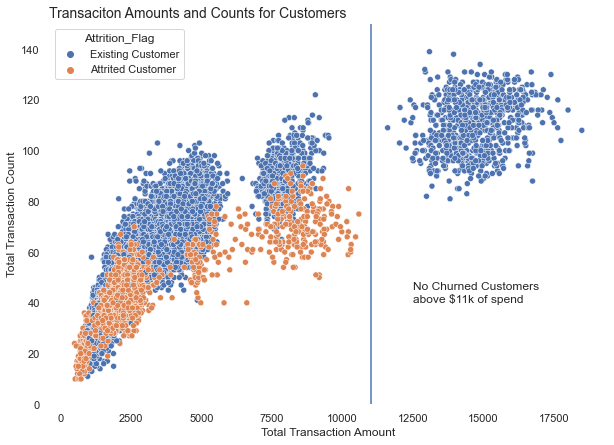

In [9]:
plt.figure(figsize=(10, 7))
sns.scatterplot(x='Total_Trans_Amt', y='Total_Trans_Ct', data=data, hue='Attrition_Flag')
sns.despine(bottom=True, left=True) # removes border
plt.ylim(0,150) # changes the limits of the y axis
plt.xlabel('Total Transaction Amount') # axis labels
plt.ylabel('Total Transaction Count') # axis labels
plt.title("Transaciton Amounts and Counts for Customers", loc='left', size=14) #title

plt.vlines(11000, 0, 150) # adds in a vertical line at the $11k mark
plt.text(12500, 40, "No Churned Customers \nabove $11k of spend") # annotation


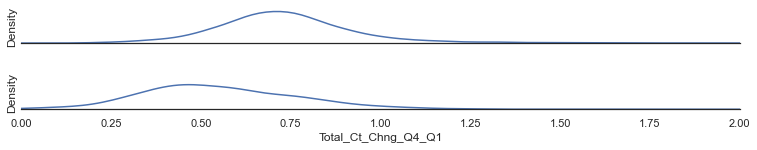

In [10]:
sns.set_theme(style="white")
g = sns.FacetGrid(data, row='Attrition_Flag', aspect=9, height=1.2)
g.map_dataframe(sns.kdeplot, x="Total_Ct_Chng_Q4_Q1")
g.set_titles("")
g.set(yticks=[])
g.despine(left=True)
plt.xlim(0,2);

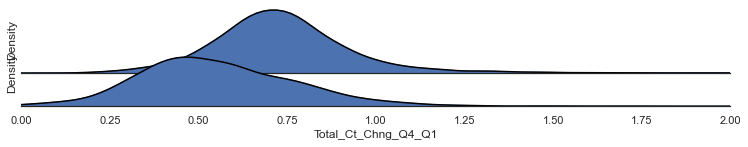

In [12]:
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})
g = sns.FacetGrid(data, row='Attrition_Flag', aspect=9, height=1.2)
g.map_dataframe(sns.kdeplot, x="Total_Ct_Chng_Q4_Q1", fill=True, alpha=1)
g.map_dataframe(sns.kdeplot, x="Total_Ct_Chng_Q4_Q1", color='black')
g.fig.subplots_adjust(hspace=-.5)
g.set_titles("")
g.set(yticks=[])
g.despine(left=True)

plt.xlim(0,2);

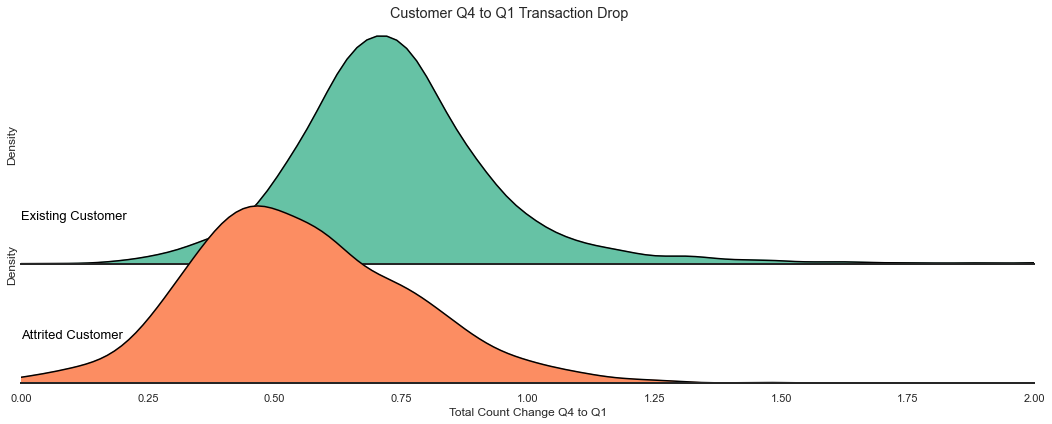

In [13]:
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0), 'axes.linewidth':2})
palette = sns.color_palette("Set2", 12)
g = sns.FacetGrid(data, palette=palette, row='Attrition_Flag', hue='Attrition_Flag', aspect=5, height=3)
g.map_dataframe(sns.kdeplot, x="Total_Ct_Chng_Q4_Q1", fill=True, alpha=1)
g.map_dataframe(sns.kdeplot, x="Total_Ct_Chng_Q4_Q1", color='black')
def label(x, color, label):
  ax = plt.gca()
  ax.text(0, .2, label, color='black', fontsize=13, ha="left", va="center", transform=ax.transAxes)

g.map(label, "Attrition_Flag")
g.fig.subplots_adjust(hspace=-.5)
g.set_titles("")
g.set(yticks=[], xlabel="Total Count Change Q4 to Q1")
g.despine(left=True)
plt.suptitle('Customer Q4 to Q1 Transaction Drop', y=0.98)

plt.xlim(0,2);

Nice! This looks much better! 

Reference [here](https://python.plainenglish.io/ridge-plots-with-pythons-seaborn-4de5725881af).